In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yf

In [2]:
stock = "NFLX"
ticker = yf.Ticker(stock)
data = ticker.history(start="2013-01-01", end="2023-12-31", interval="1mo")["Close"]

data.head()

Date
2013-01-01 00:00:00-05:00    23.605715
2013-02-01 00:00:00-05:00    26.868570
2013-03-01 00:00:00-05:00    27.040001
2013-04-01 00:00:00-04:00    30.867144
2013-05-01 00:00:00-04:00    32.321430
Name: Close, dtype: float64

In [3]:
data.index

DatetimeIndex(['2013-01-01 00:00:00-05:00', '2013-02-01 00:00:00-05:00',
               '2013-03-01 00:00:00-05:00', '2013-04-01 00:00:00-04:00',
               '2013-05-01 00:00:00-04:00', '2013-06-01 00:00:00-04:00',
               '2013-07-01 00:00:00-04:00', '2013-08-01 00:00:00-04:00',
               '2013-09-01 00:00:00-04:00', '2013-10-01 00:00:00-04:00',
               ...
               '2023-03-01 00:00:00-05:00', '2023-04-01 00:00:00-04:00',
               '2023-05-01 00:00:00-04:00', '2023-06-01 00:00:00-04:00',
               '2023-07-01 00:00:00-04:00', '2023-08-01 00:00:00-04:00',
               '2023-09-01 00:00:00-04:00', '2023-10-01 00:00:00-04:00',
               '2023-11-01 00:00:00-04:00', '2023-12-01 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=132, freq=None)

<Axes: xlabel='Date', ylabel='Close'>

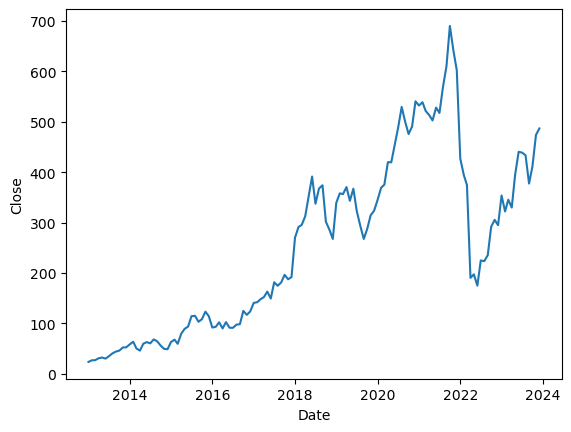

In [4]:
sns.lineplot(data = data)

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

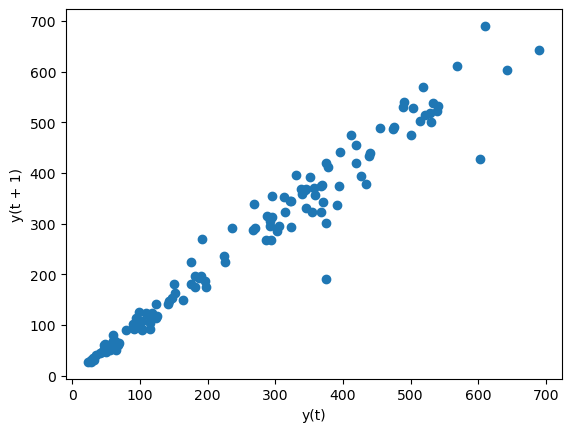

In [11]:
from pandas.plotting import lag_plot
lag_plot(data, lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 2)'>

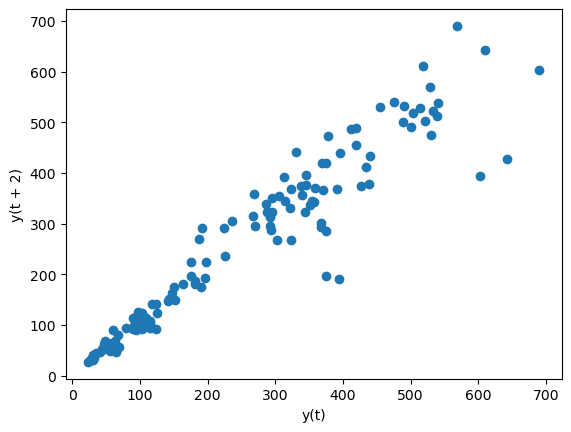

In [12]:
lag_plot(data, lag=2)

<Axes: xlabel='y(t)', ylabel='y(t + 6)'>

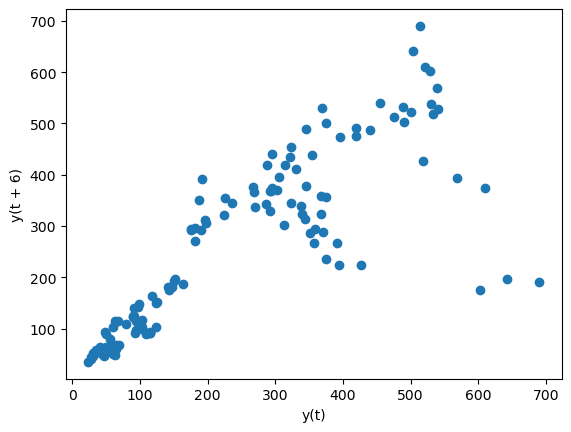

In [13]:
lag_plot(data, lag=6)

<Axes: xlabel='y(t)', ylabel='y(t + 12)'>

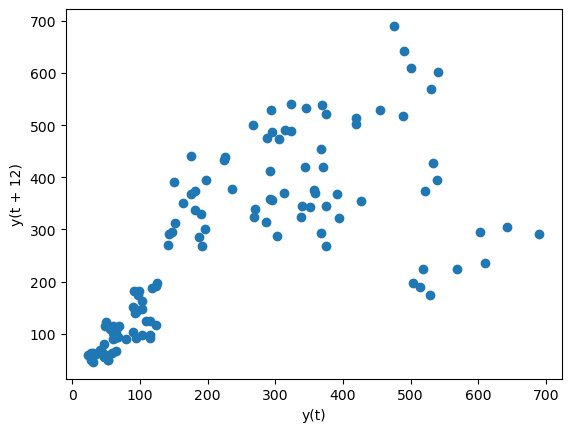

In [14]:
lag_plot(data, lag=12)

<Axes: xlabel='y(t)', ylabel='y(t + 13)'>

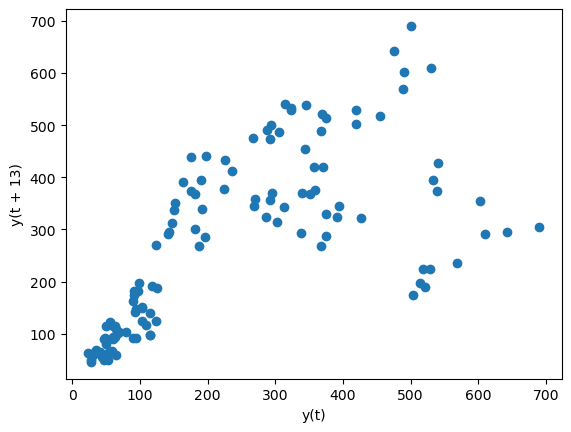

In [15]:
lag_plot(data, lag=13)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

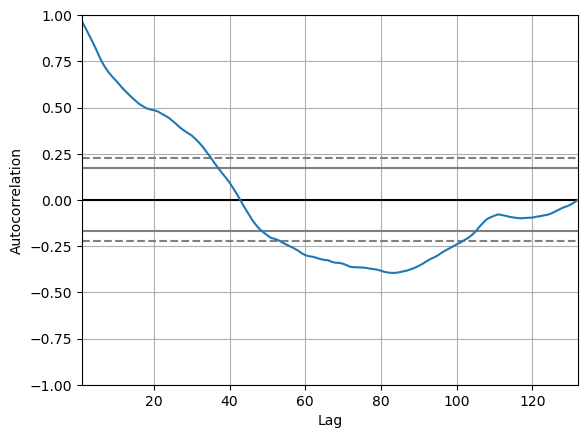

In [16]:
pd.plotting.autocorrelation_plot(data)

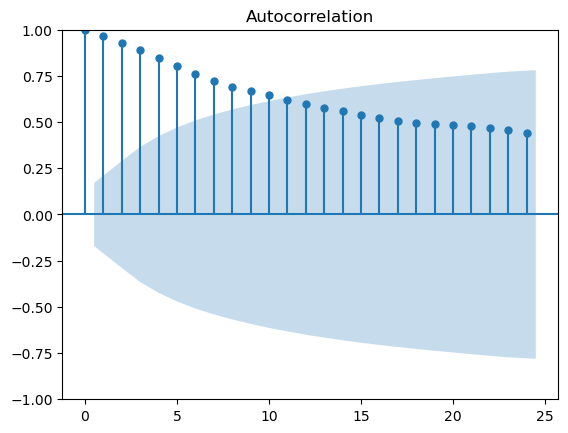

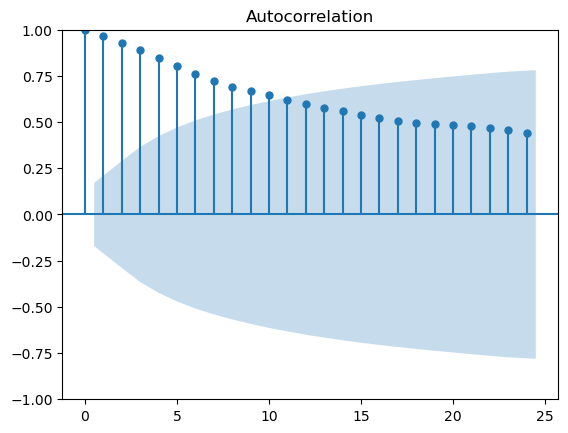

In [17]:
plot_acf(data, lags=24)

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Date
2013-01-01 00:00:00-05:00   NaN
2013-02-01 00:00:00-05:00   NaN
2013-03-01 00:00:00-05:00   NaN
2013-04-01 00:00:00-04:00   NaN
2013-05-01 00:00:00-04:00   NaN
                             ..
2023-08-01 00:00:00-04:00   NaN
2023-09-01 00:00:00-04:00   NaN
2023-10-01 00:00:00-04:00   NaN
2023-11-01 00:00:00-04:00   NaN
2023-12-01 00:00:00-05:00   NaN
Name: trend, Length: 132, dtype: float64
Date
2013-01-01 00:00:00-05:00     4.143639
2013-02-01 00:00:00-05:00     2.685685
2013-03-01 00:00:00-05:00    -1.547458
2013-04-01 00:00:00-04:00   -16.925305
2013-05-01 00:00:00-04:00    -8.183287
                               ...    
2023-08-01 00:00:00-04:00     4.377245
2023-09-01 00:00:00-04:00     1.782589
2023-10-01 00:00:00-04:00     9.172798
2023-11-01 00:00:00-04:00     5.376733
2023-12-01 00:00:00-05:00     1.376598
Name: seasonal, Length: 132, dtype: float64
Date
2013-01-01 00:00:00-05:00   NaN
2013-02-01 00:00:00-05:00   NaN
2013-03-01 00:00:00-05:00   NaN
2013-04-01 00:00:00-04:

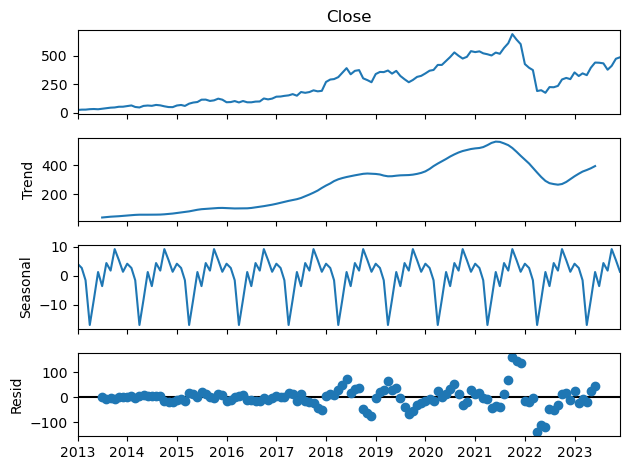

In [19]:
from matplotlib import pyplot
result = seasonal_decompose(data, model='additive')
result.plot()
pyplot.show()

### Trend
Se observa un aumento general en el precio de las acciones desde 2013 hasta 2020, seguido de un decremento en 2021 y una estabilización en los años siguientes.

### Seasonal
Se notan variaciones recurrenetes en los precios de la acción, hay una caída al principio de cada año  y un pico en cada fin de año

### Resid
Esta grafica remarca que algo sucedio a finales del 2021 ya que los residuos se alejan bastante del 0

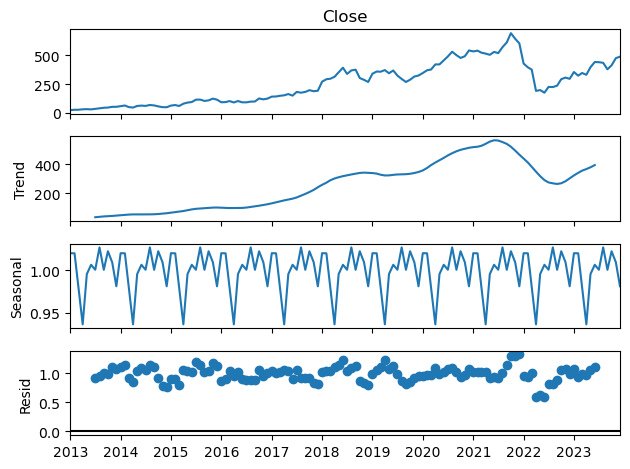

In [20]:
result = seasonal_decompose(data, model='multiplicative')
result.plot()
pyplot.show()

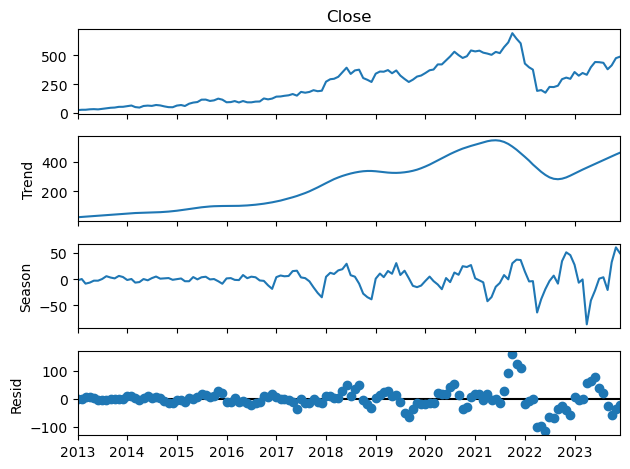

In [21]:
from statsmodels.tsa.seasonal import STL

stl = STL(data)
res = stl.fit()
fig = res.plot()

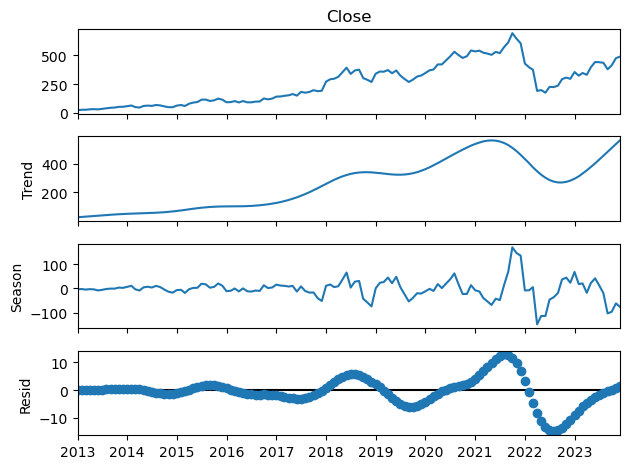

In [22]:
stl = STL(data, seasonal=3, trend = 13)
res = stl.fit()
fig = res.plot()

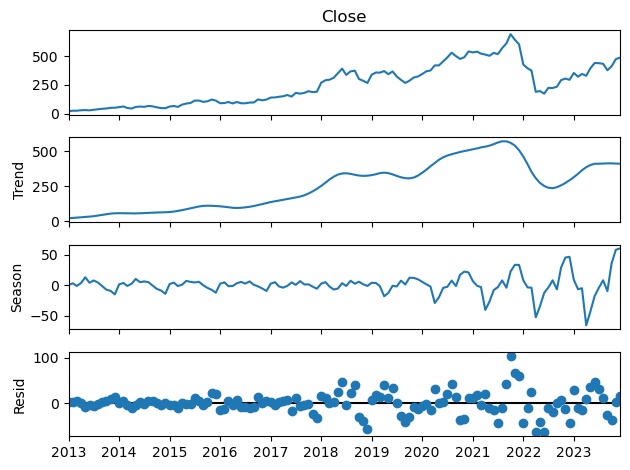

In [23]:
stl = STL(data, seasonal=13, trend = 13)
res = stl.fit()
fig = res.plot()

Al cambiar el seasonal y el trend el mayor cambio se nota en la estacionalidad ya que no son tan recurrentes las variaciones y parece ser mas "estable", en el resid se puede observar mayor cantidad de residuos alejados del 0 y en algunos casos la tendencia no parece estable en los ultimos años (lo que seria el 2023)

In [24]:
data.describe()

count    132.000000
mean     254.635379
std      173.662821
min       23.605715
25%       93.017502
50%      251.529999
75%      374.817497
max      690.309998
Name: Close, dtype: float64

In [25]:
data.skew()

0.3920668206757852

In [26]:
data.kurtosis()

-0.9736758601629445